Importamos los datos desde kaggle, creando la carpeta de data, con los datos comprmidos ( como se descarga por defecto de kaggle), y ha continuacion descomprimimos las carpetas con las imagenes

Versión de Colab

In [ ]:
# !pip install kaggle

# from google.colab import files
# import os, zipfile
# from glob import glob

# # Subir kaggle.json
# files.upload()
# os.makedirs("/root/.kaggle", exist_ok=True)
# !mv kaggle.json /root/.kaggle/
# !chmod 600 /root/.kaggle/kaggle.json

# # Descargar
# os.makedirs("data/raw", exist_ok=True)
# !kaggle datasets download -d gunavenkatdoddi/eye-diseases-classification -p data/raw


Versión en local

In [19]:
import os
import zipfile


if not os.path.exists("../data/raw"):
    os.makedirs("../data/raw")

#Descarga de datos desde kaggle
!kaggle datasets download -d gunavenkatdoddi/eye-diseases-classification -p ../data/raw

#Descomprimir zip
with zipfile.ZipFile("../data/raw/eye-diseases-classification.zip", 'r') as zip_ref:
    zip_ref.extractall("../data/raw")

Dataset URL: https://www.kaggle.com/datasets/gunavenkatdoddi/eye-diseases-classification
License(s): ODbL-1.0
eye-diseases-classification.zip: Skipping, found more recently modified local copy (use --force to force download)


## Preprocesamiento de los datos

In [20]:
import os
from PIL import Image
import numpy as np
import pandas as pd
from tqdm import tqdm

path = "../data/raw/dataset" 
target_size = (512, 512)

imgs = []
labels = []
folders = [d for d in os.listdir(path) if os.path.isdir(os.path.join(path, d))]

for folder in tqdm(folders):
    folder_path = os.path.join(path, folder) #Creamos la direccion de cada carpeta
    for fname in os.listdir(folder_path):
        fpath = os.path.join(folder_path, fname) #obtenemos direccion de cada archivo
        try:
            with Image.open(fpath) as img: 
                img = img.convert("RGB") # Lectura de image
                img = img.resize(target_size)
                arr = np.array(img)
            imgs.append(arr)
            labels.append(folder)
        except Exception as e:
            print("skip:", fpath, str(e))

X = pd.DataFrame({"image": imgs})
y = pd.DataFrame({"labels": labels})


100%|██████████| 4/4 [01:23<00:00, 20.80s/it]


## EDA

In [7]:
print("Tamaño del dataframe:",X.shape)
print("Tamaño de las imagenes:", X['image'].iloc[0].shape)

#Comprobamos que todas las imagenes tengan el mismo tamaño:

shapes = [img.shape for img in X["image"]]

# Convertir a set para ver si hay más de uno
unique_shapes = set(shapes)

print("Dimensiones encontradas:", unique_shapes)

Tamaño del dataframe: (4217, 1)
Tamaño de las imagenes: (512, 512, 3)
Dimensiones encontradas: {(512, 512, 3)}


Visualizacion de imagenes

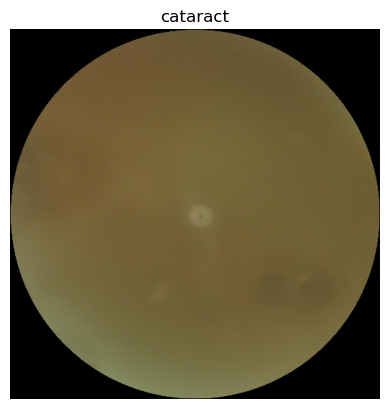

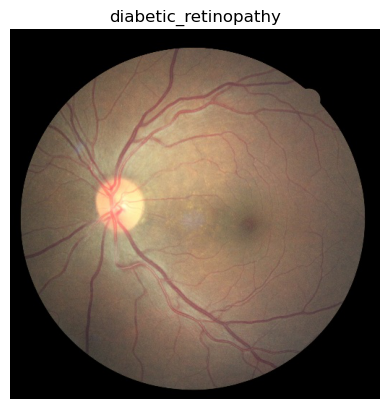

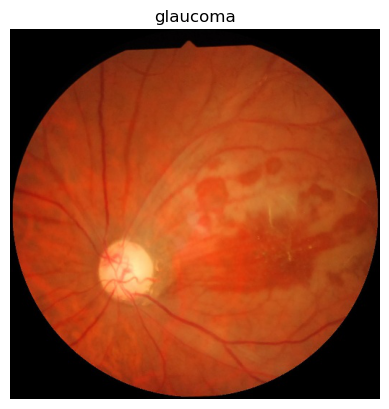

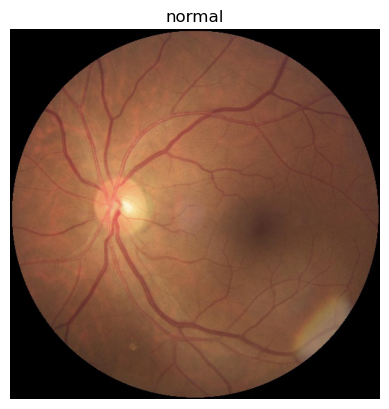

In [11]:
import matplotlib.pyplot as plt

classes = y["labels"].unique()

for label in classes:
    sample = X[y["labels"] == label].iloc[0]
    plt.imshow(sample["image"])
    plt.title(label)
    plt.axis("off")
    plt.show()

Distribución de las categorias

In [ ]:
y["labels"].value_counts()

labels
diabetic_retinopathy    1098
normal                  1074
cataract                1038
glaucoma                1007
Name: count, dtype: int64

In [12]:
#Distribución en porcentaje
y["labels"].value_counts(normalize=True) * 100


labels
diabetic_retinopathy    26.037467
normal                  25.468342
cataract                24.614655
glaucoma                23.879535
Name: proportion, dtype: float64

El conjunto de datos está formado por 4217 imágenes RGB de tamaño 512x512. 
Todas las imágenes fueron redimensionadas al mismo tamaño, para poder aplicar facilmente la CNN.
La distribución de clases es la siguiente: 
- normal 25.4%
- diabetic retinopathy 26%
- cataract 24.6%
- glaucoma 23.9%

Podemos ver como las clases estas bien distribuidas.